# Segmentation Task 3

## Requirement

    1. Open “Trump.jpg”;
    2. Use an appropriate colour space and range to segment out areas of flesh (you will need to research this);
    3. Use morphological processes to clean up the ROI.

    Advanced Task:
        Place Trump’s face somewhere entertaining!

In [4]:
# Import libraries

%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui

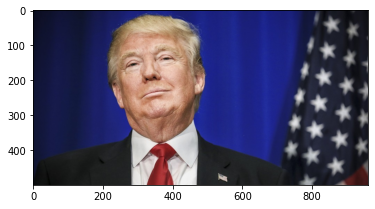

In [110]:

# Read the image
I = cv2.imread('res\Trump.jpg')

plt.imshow(cv2.cvtColor(I,cv2.COLOR_BGR2RGB))
plt.show()

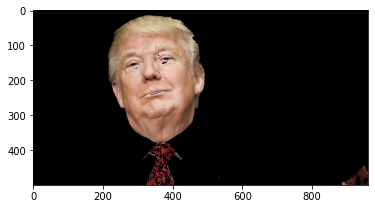

In [60]:

min_YCrCb = np.array([0,133,67],np.uint8)
max_YCrCb = np.array([255,173,133],np.uint8)

lower_HSV_values = np.array([0, 40, 60], dtype = "uint8")
upper_HSV_values = np.array([25, 255, 255], dtype = "uint8")

imageHSV = cv2.cvtColor(I,cv2.COLOR_BGR2HSV)
# Get pointer to video frames from primary device
mask_HSV = cv2.inRange(imageHSV, lower_HSV_values, upper_HSV_values)

imageYCrCb = cv2.cvtColor(I,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

skinYCrCb = cv2.bitwise_and(I, I, mask = mask_HSV)

plt.imshow(cv2.cvtColor(skinYCrCb,cv2.COLOR_BGR2RGB))
plt.show()

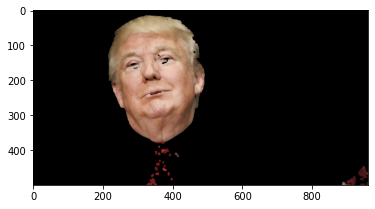

In [73]:
kernel = np.ones((5,5),np.uint8)

opening = cv2.morphologyEx(skinYCrCb, cv2.MORPH_OPEN, kernel)

plt.imshow(cv2.cvtColor( opening, cv2.MORPH_OPEN, kernel))
plt.show()

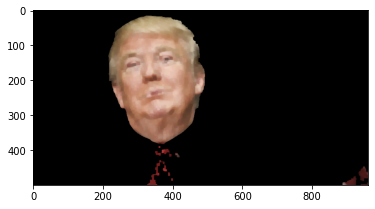

In [83]:
kernel = np.ones((7,7),np.uint8)

opening = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

plt.imshow(cv2.cvtColor( opening, cv2.MORPH_OPEN, kernel))
plt.show()

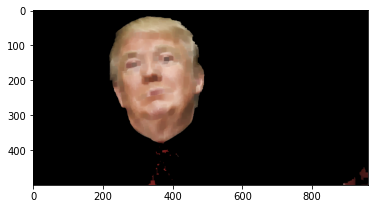

In [86]:

kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(opening,kernel,iterations = 1)

plt.imshow(cv2.cvtColor( erosion, cv2.MORPH_OPEN, kernel))
plt.show()

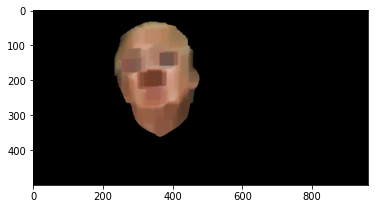

In [91]:
kernel = np.ones((7,7),np.uint8)

erosion = cv2.erode(erosion,kernel,iterations = 1)

plt.imshow(cv2.cvtColor( erosion, cv2.MORPH_OPEN, kernel))
plt.show()

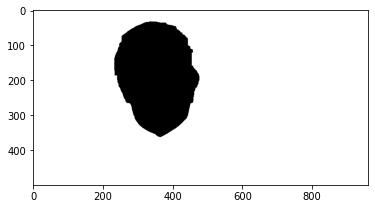

In [146]:
G = cv2.cvtColor(erosion,cv2.COLOR_BGR2GRAY)
T = np.mean(G) + np.std(G)

_,B = cv2.threshold(G,T, 255, cv2.THRESH_BINARY)
_,inv_B = cv2.threshold(G,T, 255, cv2.THRESH_BINARY_INV)
plt.imshow(inv_B, cmap = 'gray')
plt.show()

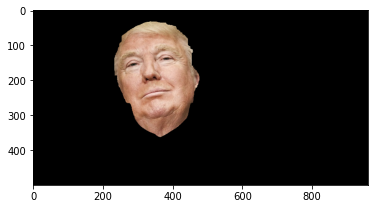

In [156]:
trump = cv2.bitwise_and(I,I,mask = B)
plt.imshow(cv2.cvtColor(trump,cv2.COLOR_BGR2RGB))
plt.show()

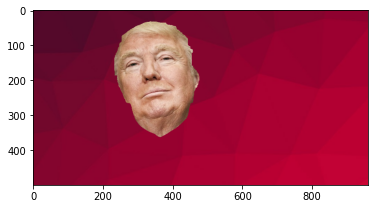

In [157]:
# Advanced Task

R = cv2.imread('res\Random_background.jpg')
# Crop the image and fit to the trump img size
new_R = R[0:len(B),0:len(B[0])]
dst = cv2.bitwise_and(new_R,new_R, mask = inv_B)
dst1 = cv2.bitwise_or(I,I, mask = B)
dst2 = dst + dst1
plt.imshow(cv2.cvtColor(dst2,cv2.COLOR_BGR2RGB))
plt.show()
